In [1]:
# python librairies installation
!pip install split-folders matplotlib opencv-python spicy


In [2]:
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

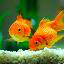

In [62]:
img_fish = image.load_img(r"D:\ReseNETDataSet\n01443537\n01443537_89.JPEG")
img_fish


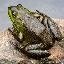

In [63]:
img_frog = image.load_img(r"D:\ReseNETDataSet\n01641577\n01641577_140.JPEG")
img_frog


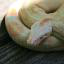

In [64]:
img_python=image.load_img(r"D:\ReseNETDataSet\n01742172\n01742172_93.JPEG")
img_python                          

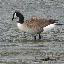

In [65]:
img_duck=image.load_img(r"D:\ReseNETDataSet\n01855672\n01855672_35.JPEG")
img_duck                          

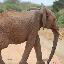

In [66]:
img_elephant=image.load_img(r"D:\ReseNETDataSet\n02504458\n02504458_38.JPEG")
img_elephant                          

In [67]:
import random

# Generate a random seed number
seed = random.randint(1, 1656)  # You can adjust the range as needed

# Use the generated seed in splitfolders.ratio
splitfolders.ratio("D:\ReseNETDataSet", output="D:\ReseNETDataSet", seed=seed, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)


Copying files: 2500 files [00:15, 164.60 files/s]


In [68]:
datagen = ImageDataGenerator()

In [69]:
# define classes name
class_names = ['fish','frog','python','duck','elephant']

In [80]:
# training data
train_generator = datagen.flow_from_directory( 
    directory=r"D:\ReseNETDataSet\train", 
#     classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
class_mode="binary", 
)

Found 1750 images belonging to 5 classes.


In [86]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory=r"D:\ReseNETDataSet\val", 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 500 images belonging to 5 classes.


In [87]:
# test data
test_generator = datagen.flow_from_directory( 
    directory=r"D:\ReseNETDataSet\test", 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)


Found 250 images belonging to 5 classes.


In [88]:
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 146s 2us/step


In [89]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [90]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [91]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")


Epoch 1/10
55/55 [==============================] - 330s 6s/step - loss: 2.0864 - accuracy: 0.2314 - val_loss: 1.4917 - val_accuracy: 0.5180
Epoch 2/10
55/55 [==============================] - 317s 6s/step - loss: 1.5032 - accuracy: 0.3474 - val_loss: 1.1594 - val_accuracy: 0.5880
Epoch 3/10
55/55 [==============================] - 323s 6s/step - loss: 1.2578 - accuracy: 0.4749 - val_loss: 0.8121 - val_accuracy: 0.7460
Epoch 4/10
55/55 [==============================] - 309s 6s/step - loss: 1.0058 - accuracy: 0.5886 - val_loss: 0.6285 - val_accuracy: 0.7500
Epoch 5/10
55/55 [==============================] - 323s 6s/step - loss: 0.8907 - accuracy: 0.6469 - val_loss: 0.5485 - val_accuracy: 0.8120
Epoch 6/10
55/55 [==============================] - 320s 6s/step - loss: 0.7858 - accuracy: 0.7023 - val_loss: 0.5051 - val_accuracy: 0.8440
Epoch 7/10
55/55 [==============================] - 372s 7s/step - loss: 0.7275 - accuracy: 0.7291 - val_loss: 0.4175 - val_accuracy: 0.8600
Epoch 8/10
55

In [92]:
model_history = trainModel(model = model, epochs = 15, optimizer = "Adam")


Epoch 1/15
55/55 [==============================] - 329s 6s/step - loss: 0.5742 - accuracy: 0.8206 - val_loss: 0.3421 - val_accuracy: 0.9000
Epoch 2/15
55/55 [==============================] - 332s 6s/step - loss: 0.4778 - accuracy: 0.8451 - val_loss: 0.3464 - val_accuracy: 0.9000
Epoch 3/15
55/55 [==============================] - 328s 6s/step - loss: 0.4247 - accuracy: 0.8611 - val_loss: 0.3423 - val_accuracy: 0.9000
Epoch 4/15
55/55 [==============================] - 332s 6s/step - loss: 0.4201 - accuracy: 0.8651 - val_loss: 0.3607 - val_accuracy: 0.8820
Epoch 5/15
55/55 [==============================] - 333s 6s/step - loss: 0.3726 - accuracy: 0.8766 - val_loss: 0.3220 - val_accuracy: 0.9060
Epoch 6/15
55/55 [==============================] - 319s 6s/step - loss: 0.3143 - accuracy: 0.8943 - val_loss: 0.3599 - val_accuracy: 0.9040
Epoch 7/15
55/55 [==============================] - 329s 6s/step - loss: 0.3171 - accuracy: 0.8897 - val_loss: 0.3524 - val_accuracy: 0.8920
Epoch 8/15
55

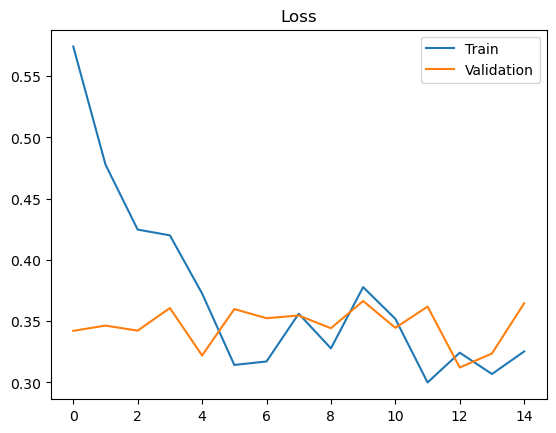

In [93]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

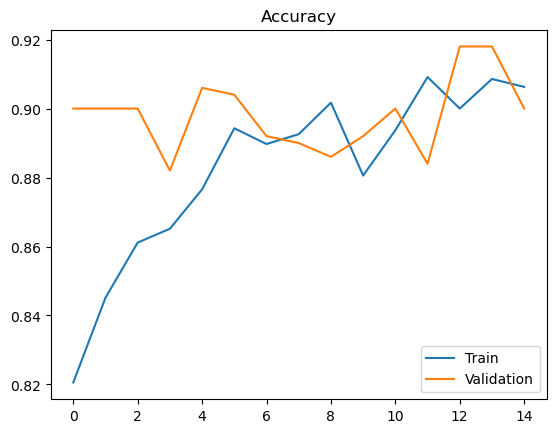

In [94]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [95]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

8/8 [==============================] - 36s 5s/step - loss: 0.4033 - accuracy: 0.8840
The test loss is:  0.40329745411872864
The best accuracy is:  88.40000033378601


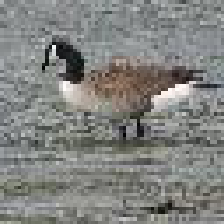

In [96]:
img = tf.keras.preprocessing.image.load_img(r"D:\ReseNETDataSet\n01855672\n01855672_35.JPEG", target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [97]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[7.2646621e-08 5.0009112e-04 1.2337348e-04 9.9936050e-01 1.5929447e-05]]


In [98]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[3]


In [99]:
# transform classes number into classes name
class_names[class_id.item()]

'duck'

In [100]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          